# EJERCICIOS

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Concatenate, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

## EJERCICIO 1


Supongamos que queremos predecir dos objetivos diferentes (por ejemplo, precio y categoría) a partir de dos conjuntos de características diferentes (por ejemplo, características visuales y características de texto de un producto).

* Características visuales: un conjunto de 128 características numéricas, que podrían representar, por ejemplo, valores de píxeles o características extraídas de imágenes.
* Características de texto: un conjunto de 256 características numéricas, representando posiblemente la codificación de texto o características lingüísticas.
* Precio (Salida 1): un valor numérico que representa el precio de un producto.
* Categoría (Salida 2): una etiqueta de categoría, que asumiremos que puede tomar 10 valores diferentes (por ejemplo, 10 categorías diferentes de productos).

Voy a generar datos aleatorios

In [2]:
# Generación de datos ficticios
num_muestras = 1000  # Número de muestras en el conjunto de datos

# Características visuales: 128 características numéricas
caracteristicas_visuales = np.random.rand(num_muestras, 128)

# Características de texto: 256 características numéricas
caracteristicas_texto = np.random.rand(num_muestras, 256)

# Precio (Salida 1): Valor numérico (por ejemplo, precio de un producto)
precio = np.random.rand(num_muestras, 1)

# Categoría (Salida 2): 10 categorías posibles (codificadas en one-hot)
categorias = np.random.randint(0, 10, size=(num_muestras, 1))
categorias_one_hot = tf.keras.utils.to_categorical(categorias, num_classes=10)

Divide los datos en entrenamiento y prueba

In [3]:
X_train_visuales, X_test_visuales, X_train_texto, X_test_texto, y_train_precio, y_test_precio, y_train_categorias, y_test_categorias = train_test_split(
    caracteristicas_visuales, 
    caracteristicas_texto, 
    precio, 
    categorias_one_hot, 
    test_size=0.2, 
    random_state=42
)

Construye el modelo:
* Crea dos ramas de entrada, una para cada tipo de características.
* Las ramas se fusionarán para predecir el precio.
* Una de las ramas se utilizará también para predecir la categoria.

El esquema es el siguiente:

<img src="esquema_modelo_funcional.png" alt="esquema modelo funcional"/>

In [4]:
# Definimos las entradas
input_visual = Input(shape=(128,), name="input_visual")
input_texto = Input(shape=(256,), name="input_texto")

# Rama visual
rama_visual = Dense(64, activation="relu", name="rama_visual")(input_visual)

# Rama textual
rama_texto = Dense(128, activation="relu", name="rama_texto")(input_texto)

# Combinación de las dos ramas
combinacion = Concatenate(name="combinacion")([rama_visual, rama_texto])

# Salida para predecir el precio
salida_precio = Dense(1, activation="linear", name="salida_precio")(combinacion)

# Salida para predecir la categoría (usando la rama textual)
salida_categoria = Dense(10, activation="softmax", name="salida_categoria")(rama_texto)

# Creación del modelo
modelo = Model(
    inputs=[input_visual, input_texto],
    outputs=[salida_precio, salida_categoria]
)

# Resumen del modelo
modelo.summary()

I0000 00:00:1736956327.213100    7009 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9625 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_visual        │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_texto         │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rama_visual (Dense) │ (None, 64)        │      8,256 │ input_visual[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rama_texto (Dense)  │ (None, 128)       │     32,896 │ input_texto[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combinacion         │ (None, 192)       │          0 │ rama_visual[0][0… │
│ (Concatenate)       │                   │            │ rama_texto[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ salida_precio       │ (None, 1)         │        193 │ combinacion[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ salida_categoria    │ (None, 10)        │      1,290 │ rama_texto[0][0]  │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 42,635 (166.54 KB)

 Trainable params: 42,635 (166.54 KB)

 Non-trainable params: 0 (0.00 B)

Comprueba creando una imagen del modelo que es igual que el que se pide

In [5]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# Crear la imagen del modelo y guardarla en un archivo
plot_model(
    modelo, 
    to_file="modelo_funcional.png",  # Nombre del archivo de salida
    show_shapes=True,                # Mostrar las formas de los tensores en la imagen
    show_layer_names=True,           # Mostrar los nombres de las capas
    dpi=96                           # Resolución de la imagen
)

print("La imagen del modelo se ha creado y guardado como 'modelo_funcional.png'.")


La imagen del modelo se ha creado y guardado como 'modelo_funcional.png'.


<img src="modelo_funcional.png" alt="mi modelo funcional"/>

Compila el modelo especificando las pérdidas y métricas para cada salida (utiliza el optimizador Adam)

In [7]:
# Compilación del modelo
modelo.compile(
    optimizer="adam",
    loss={
        "salida_precio": "mae",
        "salida_categoria": "categorical_crossentropy"
    },
    metrics={
        "salida_precio": "mae",
        "salida_categoria": "accuracy"
    }
)

Entrena el modelo 

In [8]:
# Entrenar el modelo
historial = modelo.fit(
    {"input_visual": X_train_visuales, "input_texto": X_train_texto},
    {"salida_precio": y_train_precio, "salida_categoria": y_train_categorias},
    validation_split=0.2,   # Dividir un 20% del entrenamiento para validación
    epochs=10,              # Número de épocas
    batch_size=32,          # Tamaño de batch
    verbose=1               # Mostrar el progreso del entrenamiento
)

Epoch 1/10


I0000 00:00:1736956642.290928    7088 service.cc:148] XLA service 0x74be58004580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736956642.291082    7088 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-01-15 16:57:22.316587: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736956642.416525    7088 cuda_dnn.cc:529] Loaded cuDNN version 90600


 1/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - loss: 3.2679 - salida_categoria_accuracy: 0.0625 - salida_categoria_loss: 2.5173 - salida_precio_loss: 0.7506 - salida_precio_mae: 0.7506

I0000 00:00:1736956643.200879    7088 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.8816 - salida_categoria_accuracy: 0.0959 - salida_categoria_loss: 2.4234 - salida_precio_loss: 0.4582 - salida_precio_mae: 0.4582 - val_loss: 2.6732 - val_salida_categoria_accuracy: 0.0875 - val_salida_categoria_loss: 2.3496 - val_salida_precio_loss: 0.3236 - val_salida_precio_mae: 0.3236
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5751 - salida_categoria_accuracy: 0.1408 - salida_categoria_loss: 2.2913 - salida_precio_loss: 0.2838 - salida_precio_mae: 0.2838 - val_loss: 2.6426 - val_salida_categoria_accuracy: 0.1000 - val_salida_categoria_loss: 2.3205 - val_salida_precio_loss: 0.3222 - val_salida_precio_mae: 0.3222
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5268 - salida_categoria_accuracy: 0.1652 - salida_categoria_loss: 2.2514 - salida_precio_loss: 0.2755 - salida_precio_mae: 0.2755 - val_loss: 2.6243 - val_salida_categoria_accuracy: 0.1125 - val_salida_categoria_loss: 2.3124 - val_salida_precio_loss:

Evalúa el modelo en el conjunt de pruebas

In [9]:
# Evaluar el modelo con el conjunto de pruebas
resultados = modelo.evaluate(
    {"input_visual": X_test_visuales, "input_texto": X_test_texto},
    {"salida_precio": y_test_precio, "salida_categoria": y_test_categorias},
    verbose=1
)

# Mostrar resultados
print("\nResultados de evaluación:")
print(f"Pérdida total: {resultados[0]}")
print(f"Pérdida precio: {resultados[1]}")
print(f"MAE precio: {resultados[2]}")
print(f"Pérdida categoría: {resultados[3]}")
print(f"Precisión categoría: {resultados[4]}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.7044 - salida_categoria_accuracy: 0.0948 - salida_categoria_loss: 2.3990 - salida_precio_loss: 0.3109 - salida_precio_mae: 0.3088

Resultados de evaluación:
Pérdida total: 2.672969102859497
Pérdida precio: 0.30701833963394165
MAE precio: 2.3880646228790283
Pérdida categoría: 0.10999999940395355
Precisión categoría: 0.29883885383605957


## EJERCICIO 2

El objetivo de este ejercicio es entrenar un modelo en un subconjunto de clases (Modelo A) y luego usar este modelo para entrenar otro modelo en un subconjunto diferente de clases (Modelo B), primero sin y luego con el conocimiento transferido del Modelo A.

Carga los datos de CIFAR-10, representa alguna de sus imágenes con sus etiquetas, haz una lista con las etiquetas que tiene (busca en internet) y normaliza los datos dividiendo entre 255.0.

Divide los datos en conjuntos de entrenamiento, pruebas y validación para el modelo A y para el modelo B:
* El modelo A utiliza las clases "avión", "automóvil", "pájaro" y "gato"
* El modelo B utiliza las clases "ciervo", "perro", "rana" y "caballo" 

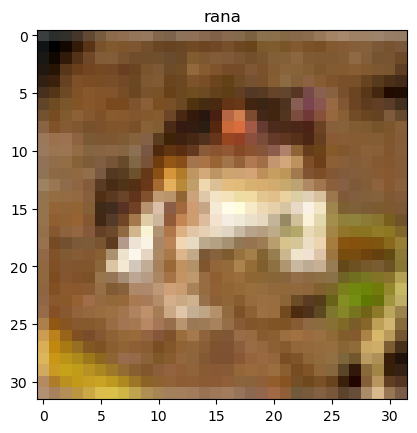

In [12]:
# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Etiquetas de CIFAR-10
labels = [
    'avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 
    'perro', 'rana', 'caballo', 'barco', 'camión'
]

# Mostrar una imagen del conjunto de entrenamiento con su etiqueta
plt.imshow(x_train[0])
plt.title(labels[y_train[0][0]])  # Obtener la etiqueta de la imagen
plt.show()

# Normalizar los datos (dividir entre 255.0)
x_train, x_test = x_train / 255.0, x_test / 255.0


# Filtrar las clases para el Modelo A (clases: 'avión', 'automóvil', 'pájaro', 'gato') - clases 0, 1, 2, 3
train_mask_A = np.isin(y_train, [0, 1, 2, 3]).flatten()
test_mask_A = np.isin(y_test, [0, 1, 2, 3]).flatten()

x_train_A = x_train[train_mask_A]
y_train_A = y_train[train_mask_A]
x_test_A = x_test[test_mask_A]
y_test_A = y_test[test_mask_A]

# Filtrar las clases para el Modelo B (clases: 'ciervo', 'perro', 'rana', 'caballo') - clases 4, 5, 6, 7
train_mask_B = np.isin(y_train, [4, 5, 6, 7]).flatten()
test_mask_B = np.isin(y_test, [4, 5, 6, 7]).flatten()

x_train_B = x_train[train_mask_B]
y_train_B = y_train[train_mask_B]
x_test_B = x_test[test_mask_B]
y_test_B = y_test[test_mask_B]

# Dividir los datos de entrenamiento en conjuntos de entrenamiento, validación y prueba para el Modelo A
x_train_A, x_val_A, y_train_A, y_val_A = train_test_split(x_train_A, y_train_A, test_size=0.1, random_state=42)
x_train_A, x_test_A, y_train_A, y_test_A = train_test_split(x_train_A, y_train_A, test_size=0.1, random_state=42)

# Dividir los datos de entrenamiento en conjuntos de entrenamiento, validación y prueba para el Modelo B
x_train_B, x_val_B, y_train_B, y_val_B = train_test_split(x_train_B, y_train_B, test_size=0.1, random_state=42)
x_train_B, x_test_B, y_train_B, y_test_B = train_test_split(x_train_B, y_train_B, test_size=0.1, random_state=42)


Entrena el Modelo A

In [14]:
# Crear el modelo para el Modelo A
model_A = Sequential([
    # Capa de convolución con 32 filtros, tamaño de kernel (3x3) y activación ReLU
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    # Capa de convolución con 64 filtros, tamaño de kernel (3x3) y activación ReLU
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Capa de convolución con 64 filtros, tamaño de kernel (3x3) y activación ReLU
    Conv2D(64, (3, 3), activation='relu'),
    
    # Capa de aplanado
    Flatten(),
    
    # Capa densa de 64 neuronas con activación ReLU
    Dense(64, activation='relu'),
    
    # Capa de salida con 4 neuronas (para 4 clases) y activación softmax
    Dense(4, activation='softmax')
])

# Compilar el modelo
model_A.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenar el modelo
history_A = model_A.fit(x_train_A, y_train_A, epochs=10, batch_size=64, validation_data=(x_val_A, y_val_A))

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model_A.evaluate(x_test_A, y_test_A, verbose=2)

print(f"Modelo A - Precisión en el conjunto de prueba: {test_acc:.4f}")


/home/iabd/anaconda3/envs/sapa/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5214 - loss: 1.0510 - val_accuracy: 0.7240 - val_loss: 0.6965
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7288 - loss: 0.6852 - val_accuracy: 0.7450 - val_loss: 0.6603
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7602 - loss: 0.6104 - val_accuracy: 0.7520 - val_loss: 0.6065
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7847 - loss: 0.5447 - val_accuracy: 0.7745 - val_loss: 0.5617
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8075 - loss: 0.4914 - val_accuracy: 0.7980 - val_loss: 0.5210
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8216 - loss: 0.4587 - val_accuracy: 0.8080 - val_loss: 0.4786
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8377 - loss: 0.4176 - val_accuracy: 0.8065 - val_loss: 0.4842
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8542 - loss: 0.3826 - val_accuracy: 0

Entrenar el Modelo B desde 0

In [15]:
# Crear el modelo para el Modelo B
model_B = Sequential([
    # Capa de convolución con 32 filtros, tamaño de kernel (3x3) y activación ReLU
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    # Capa de convolución con 64 filtros, tamaño de kernel (3x3) y activación ReLU
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Capa de convolución con 64 filtros, tamaño de kernel (3x3) y activación ReLU
    Conv2D(64, (3, 3), activation='relu'),
    
    # Capa de aplanado
    Flatten(),
    
    # Capa densa de 64 neuronas con activación ReLU
    Dense(64, activation='relu'),
    
    # Capa de salida con 4 neuronas (para 4 clases) y activación softmax
    Dense(4, activation='softmax')
])

# Compilar el modelo
model_B.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenar el modelo
history_B = model_B.fit(x_train_B, y_train_B, epochs=10, batch_size=64, validation_data=(x_val_B, y_val_B))

# Evaluar el modelo en los datos de prueba
test_loss_B, test_acc_B = model_B.evaluate(x_test_B, y_test_B, verbose=2)

print(f"Modelo B - Precisión en el conjunto de prueba: {test_acc_B:.4f}")

Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - v

Entrenar el Modelo B utilizando las capas aprendidas del Modelo A (excepto la capa de salida)

In [16]:
# Crear el modelo para el Modelo B utilizando transferencia de conocimiento del Modelo A
model_B_transfer = Sequential([
    # Capas convolucionales del Modelo A (congeladas)
    model_A.layers[0],  # Capa Conv2D 1
    model_A.layers[1],  # Capa MaxPooling2D 1
    model_A.layers[2],  # Capa Conv2D 2
    model_A.layers[3],  # Capa MaxPooling2D 2
    model_A.layers[4],  # Capa Conv2D 3
    
    # Capa de aplanado
    model_A.layers[5],  # Capa Flatten
    
    # Capa densa de 64 neuronas con activación ReLU
    model_A.layers[6],  # Capa Dense 64
    
    # Nueva capa de salida con 4 neuronas (para las 4 clases de Modelo B)
    Dense(4, activation='softmax')  # Cambiar el número de clases
])

# Congelar las capas convolucionales y densas preentrenadas del Modelo A
for layer in model_B_transfer.layers[:-1]:
    layer.trainable = False  # No entrenar las capas previas

# Compilar el modelo
model_B_transfer.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Entrenar el modelo B con las capas preentrenadas
history_B_transfer = model_B_transfer.fit(x_train_B, y_train_B, epochs=10, batch_size=64, validation_data=(x_val_B, y_val_B))

# Evaluar el modelo en los datos de prueba
test_loss_B_transfer, test_acc_B_transfer = model_B_transfer.evaluate(x_test_B, y_test_B, verbose=2)

print(f"Modelo B con transferencia de conocimiento - Precisión en el conjunto de prueba: {test_acc_B_transfer:.4f}")


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - v

Evaluar los dos modelos para el conjunto de datos B en el conjunto de pruebas

In [17]:
# Evaluar el Modelo A en el conjunto de datos B (Modelo B en el conjunto de prueba)
test_loss_A_B, test_acc_A_B = model_A.evaluate(x_test_B, y_test_B, verbose=2)
print(f"Modelo A en el conjunto de datos B - Precisión: {test_acc_A_B:.4f}")

# Evaluar el Modelo B (entrenado desde cero) en el conjunto de datos B
test_loss_B_B, test_acc_B_B = model_B.evaluate(x_test_B, y_test_B, verbose=2)
print(f"Modelo B (entrenado desde cero) en el conjunto de datos B - Precisión: {test_acc_B_B:.4f}")

# Evaluar el Modelo B con transferencia de conocimiento en el conjunto de datos B
test_loss_B_transfer, test_acc_B_transfer = model_B_transfer.evaluate(x_test_B, y_test_B, verbose=2)
print(f"Modelo B con transferencia de conocimiento en el conjunto de datos B - Precisión: {test_acc_B_transfer:.4f}")


57/57 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: nan
Modelo A en el conjunto de datos B - Precisión: 0.0000
57/57 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: nan
Modelo B (entrenado desde cero) en el conjunto de datos B - Precisión: 0.0000
57/57 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: nan
Modelo B con transferencia de conocimiento en el conjunto de datos B - Precisión: 0.0000


¿En este caso merece la pena?